## Markov model for estimating the percentage of cases missed as a result of poor contact tracing. 

In [ ]:
import numpy as np
def probablityGenerator(recieveTesting, truePositive, madeContactPatient, patientNamesContacts, madeContactContacts, contactsTested, truePositiveContact):
  ##np.random.uniform(low (inclusive),high (exclusive))
  ##We pull from a uniform distribution with a=min(% from lit review) and b=max(% from lit review +0.01) -- to make sure it is inclusive
  recieveTestingProb = np.random.uniform(recieveTesting[0],recieveTesting[1])
  truePositiveProb = np.random.uniform(truePositive[0],truePositive[1])
  madeContactPatientProb = np.random.uniform(madeContactPatient[0],madeContactPatient[1])
  patientNamesContactsProb = np.random.uniform(patientNamesContacts[0],patientNamesContacts[1])
  madeContactContactsProb = np.random.uniform(madeContactContacts[0],madeContactContacts[1])
  contactsTestedProb = np.random.uniform(contactsTested[0],contactsTested[1])
  truePositiveContactProb = np.random.uniform(truePositive[0],truePositive[1])
  allProbs = [recieveTestingProb, truePositiveProb, madeContactPatientProb, patientNamesContactsProb, madeContactContactsProb, contactsTestedProb, truePositiveProb]
  return allProbs

In [ ]:
##Simulation for Rapid Test

##a=min(% from lit review) and b=max(% from lit review +0.01) -- to make sure it is inclusive
percentRealized = []
recieveTesting = (0,1)
truePositive = (0.57, 0.74)
madeContactPatient = (0.41,0.83)
patientNamesContacts = (0.17,0.53)
madeContactContacts = (0.28,0.86)
contactsTested = (0.19,0.46)
truePositiveContact = (0.57, 0.74)

phaseOneProbs = []
phaseTwoProbs = []
phaseThreeProbs = []

##Simulate 10,000 times
for i in range(10000):
  currentProb = 1
  probs = probablityGenerator(recieveTesting, truePositive, madeContactPatient, patientNamesContacts, madeContactContacts, contactsTested, truePositiveContact)
  phaseOneCurrProb = 1
  phaseTwoCurrProb = 1
  phaseThreeCurrProb = 1
  ##This step find the cumulative drop off in our known cases (multiplying all the probabilities together)
  for j in range(len(probs)):
    currentProb = currentProb*probs[j]
    if(j==0 or j==1 or j==2):
      phaseOneCurrProb = phaseOneCurrProb*probs[j]
    elif(j==3 or j==4):
      phaseTwoCurrProb = phaseTwoCurrProb*probs[j]
    else:
      phaseThreeCurrProb = phaseThreeCurrProb*probs[j]
  percentRealized.append(currentProb)
  phaseOneProbs.append(phaseOneCurrProb)
  phaseTwoProbs.append(phaseTwoCurrProb)
  phaseThreeProbs.append(phaseThreeCurrProb)

print(np.mean(percentRealized))
print(np.var(percentRealized))
print(np.mean(percentRealized)+1.96*np.sqrt(np.var(percentRealized)/10000),np.mean(percentRealized)-1.96*np.sqrt(np.var(percentRealized)/10000))

print('Phase 1: ', np.mean(phaseOneProbs))
print('Phase 2: ', np.mean(phaseTwoProbs))
print('Phase 3: ', np.mean(phaseThreeProbs))

0.008617514773107671
5.800141663475389e-05
0.008766785748901385 0.008468243797313958
Phase 1:  0.20173863828736446
Phase 2:  0.20018993843037874
Phase 3:  0.21205392534504164


In [ ]:
##Simulation for PCR Test (Assuming 90% true positive rate)

##Define the parameters
##a=min(% from lit review) and b=max(% from lit review +0.01) -- to make sure it is inclusive
percentRealizedHeat = []
qualTestingUS = []
qualContactTracingUS = []
recieveTesting = (0,1)
truePositive = (0.88, 0.92)
madeContactPatient = (0.41,0.83)
patientNamesContacts = (0.17,0.53)
madeContactContacts = (0.28,0.86)
contactsTested = (0.19,0.46)
truePositiveContact = (0.88, 0.92)


phaseOneProbs = []
phaseTwoProbs = []
phaseThreeProbs = []

##Simulate 10,000 times
for i in range(10000):
  currentProb = 1
  currQual = 1
  currTest = 1
  probs = probablityGenerator(recieveTesting, truePositive, madeContactPatient,patientNamesContacts, madeContactContacts, contactsTested, truePositiveContact)
  phaseOneCurrProb = 1
  phaseTwoCurrProb = 1
  phaseThreeCurrProb = 1
  ##This step find the cumulative drop off in our known cases (multiplying all the probabilities together)
  for j in range(len(probs)):
    if (j== 0 or j==1 or j == 5 or j ==6):
      currTest = currTest*probs[j]
    if (j==2 or j ==3 or j==4):
      currQual = currQual*probs[j]
    currentProb = currentProb*probs[j]
    if(j==0 or j==1 or j==2):
      phaseOneCurrProb = phaseOneCurrProb*probs[j]
    elif(j==3 or j==4):
      phaseTwoCurrProb = phaseTwoCurrProb*probs[j]
    else:
      phaseThreeCurrProb = phaseThreeCurrProb*probs[j]
  percentRealizedHeat.append(currentProb)
  qualTestingUS.append(currQual)
  qualContactTracingUS.append(currTest)
  phaseOneProbs.append(phaseOneCurrProb)
  phaseTwoProbs.append(phaseTwoCurrProb)
  phaseThreeProbs.append(phaseThreeCurrProb)
print(np.mean(percentRealizedHeat))
print(np.var(percentRealizedHeat))
print(np.mean(percentRealizedHeat)+1.96*np.sqrt(np.var(percentRealizedHeat)/10000),np.mean(percentRealizedHeat)-1.96*np.sqrt(np.var(percentRealizedHeat)/10000))
print('end relevant')
print(np.mean(qualContactTracingUS))
print(np.mean(qualTestingUS))


upBoundQualContactAmerica = np.mean(qualContactTracingUS) + np.var(qualContactTracingUS)
lowBoundQualContactAmerica = np.mean(qualContactTracingUS) - np.var(qualContactTracingUS)
upBoundQualTestingAmerica = np.mean(qualTestingUS) + np.var(qualTestingUS)
lowBoundQualTestingAmerica = np.mean(qualTestingUS) - np.var(qualTestingUS)

print('Phase 1: ', np.mean(phaseOneProbs))
print('Phase 2: ', np.mean(phaseTwoProbs))
print('Phase 3: ', np.mean(phaseThreeProbs))

0.016232546202254422
0.0001919208122176143
0.016504075757223156 0.01596101664728569
end relevant
0.13222993374934694
0.12301555678506372
Phase 1:  0.2793246509178265
Phase 2:  0.1988407537092472
Phase 3:  0.2927617327034535


In [ ]:
##Hypothesized Values for Stricter Contact Tracing
##Simulation for PCR Test (Assuming 90% true positive rate)

##Define the parameters
##a=min(% from lit review) and b=max(% from lit review +0.01) -- to make sure it is inclusive
percentRealizedHeat = []
qualTesting = []
qualContactTracing = []
recieveTesting = (0.9,1)
truePositive = (0.88, 0.92)
madeContactPatient = (0.9,1)
patientNamesContacts = (0.9,1)
madeContactContacts = (0.9,1)
contactsTested = (0.9,1)
truePositiveContact = (0.88, 0.92)

##Simulate 10,000 times
for i in range(10000):
  currentProb = 1
  currQual = 1
  currTest = 1
  probs = probablityGenerator(recieveTesting, truePositive, madeContactPatient,patientNamesContacts, madeContactContacts, contactsTested, truePositiveContact)
  ##This step find the cumulative drop off in our known cases (multiplying all the probabilities together)
  for j in range(len(probs)):
    if (j== 0 or j==1 or j == 5 or j ==6):
      currTest = currTest*probs[j]
    if (j==2 or j ==3 or j==4):
      currQual = currQual*probs[j]
    currentProb = currentProb*probs[j]
  percentRealizedHeat.append(currentProb)
  qualTesting.append(currQual)
  qualContactTracing.append(currTest)
print(np.mean(percentRealizedHeat))
print(np.var(percentRealizedHeat))
print(np.mean(percentRealizedHeat)+1.96*np.sqrt(np.var(percentRealizedHeat)/10000),np.mean(percentRealizedHeat)-1.96*np.sqrt(np.var(percentRealizedHeat)/10000))
print('end relevant')
print(np.mean(qualContactTracing))
print(np.mean(qualTesting))
print(np.var(qualContactTracing))
print(np.var(qualTesting))

upBoundQualContact = np.mean(qualContactTracing) + np.var(qualContactTracing)
lowBoundQualContact = np.mean(qualContactTracing) - np.var(qualContactTracing)
upBoundQualTesting = np.mean(qualTesting) + np.var(qualTesting)
lowBoundQualTesting = np.mean(qualTesting) - np.var(qualTesting)

0.6271656062999448
0.0021094873431295067
0.6280658177516252 0.6262653948482644
end relevant
0.7317105518541961
0.8570840828526641
0.0013426920905995276
0.0020325035687313287


Text(0, 0.5, 'Quality of Contact Tracing')

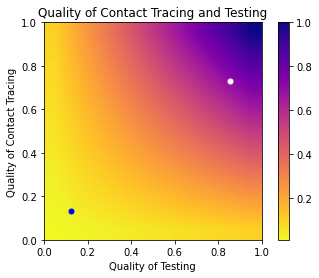

In [ ]:
##Sensitivity Analysis for Sweeps
##Heatmap 

##Note - I did this with the PCR Test Assumption - but I don't think it matters

import numpy as np
import matplotlib.pyplot as plt
 
# Mathematical function we need to plot
def z_func(x, y):
  return x*y
# Setting up input values
test = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
x = sorted(test)
y = sorted(test)
X, Y = np.meshgrid(x, y)
 
# Calculating the output and storing it in the array Z
Z = z_func(X, Y)

#United States
plt.plot([np.mean(qualTestingUS)],[np.mean(qualContactTracingUS)],marker="o", markersize=5, markeredgecolor="blue",markerfacecolor="blue")


#South Korea / Taiwan 
plt.plot([np.mean(qualTesting)],[np.mean(qualContactTracing)],marker="o", markersize=5, markeredgecolor="white", markerfacecolor="white")

im = plt.imshow(Z, cmap=plt.cm.plasma_r, origin='lower', extent=(0, 1, 0,1), interpolation='bilinear')
 
plt.colorbar(im)


plt.title('Quality of Contact Tracing and Testing')
plt.xlabel('Quality of Testing')
plt.ylabel('Quality of Contact Tracing')

In [ ]:
##Hypothesized Values for Stricter Contact Tracing
##Simulation for Rapid Test

##Define the parameters
##a=min(% from lit review) and b=max(% from lit review +0.01) -- to make sure it is inclusive
percentRealized = []
recieveTesting = (0.9,1)
truePositive = (0.57, 0.74)
madeContactPatient = (0.9,1)
patientNamesContacts = (0.9,1)
madeContactContacts = (0.9,1)
contactsTested = (0.9,1)
truePositiveContact = (0.57, 0.74)

##Simulate 10,000 times
for i in range(10000):
  currentProb = 1
  probs = probablityGenerator(recieveTesting, truePositive, madeContactPatient, patientNamesContacts, madeContactContacts, contactsTested, truePositiveContact)
  ##This step find the cumulative drop off in our known cases (multiplying all the probabilities together)
  for j in probs:
    currentProb = currentProb*j
  percentRealized.append(currentProb)
print(np.mean(percentRealized))
print(np.var(percentRealized))
print(np.mean(percentRealized)+1.96*np.sqrt(np.var(percentRealized)/10000),np.mean(percentRealized)-1.96*np.sqrt(np.var(percentRealized)/10000))

0.33468737259521164
0.0030118618179326346
0.3357630290626663 0.333611716127757
